In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
profile_df = pd.read_csv("customer_profiles.csv")
ad_events_df = pd.read_csv("ad_events.csv")
ad_details_df = pd.read_csv("ad_details.csv")

In [3]:
experimentId = "f19421c1d4aa40978ebb69ca19b0e20d"

In [43]:
targetEvent = ad_events_df[bool(re.search("9b98b8c7a33c4b65b9aebfe6a799e6d9", ad_events_df["event_info"])) == True]

TypeError: expected string or bytes-like object

In [5]:
targetEvent.head()

,customer,event,event_info,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
18,ebe7ef46ea6f4963a7dd49f501b26779,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
21,f082d80f0aac47a99173ba8ef8fc1909,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
28,c0d210398dee4a0895b24444a5fcd1d2,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
30,57dd18ec5ddc46828afb81ec5977bef2,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0


In [6]:
targetEvent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11848 entries, 0 to 306196
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customer    11848 non-null  object
 1   event       11848 non-null  object
 2   event_info  11848 non-null  object
 3   time        11848 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 462.8+ KB


In [37]:
target_customers = targetEvent['customer']

# Filter profile_df to keep only rows where 'id' matches one of the customer IDs in targetEvent
filtered_df = profile_df[profile_df['id'].isin(target_customers)]

In [38]:
filtered_df.head()

,gender,age,id,became_member_on (year month day),income,ever_married,kids,home_state


In [39]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             0 non-null      object 
 1   age                                0 non-null      int64  
 2   id                                 0 non-null      object 
 3   became_member_on (year month day)  0 non-null      int64  
 4   income                             0 non-null      float64
 5   ever_married                       0 non-null      object 
 6   kids                               0 non-null      int64  
 7   home_state                         0 non-null      object 
dtypes: float64(1), int64(3), object(4)
memory usage: 0.0+ bytes


<AxesSubplot:xlabel='age', ylabel='Count'>

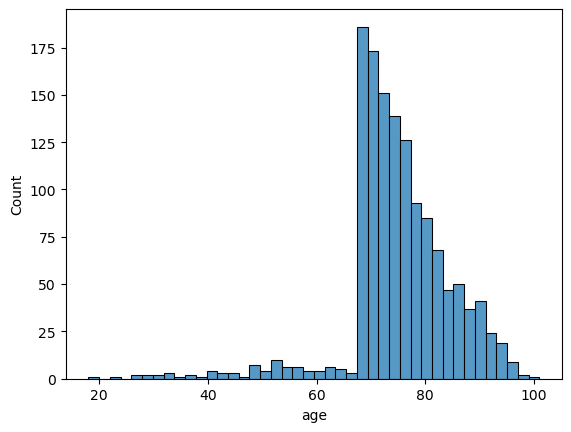

In [34]:
sns.histplot(data=filtered_df[filtered_df['home_state'] == "Florida"], x="age")

In [70]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = ['age', 'income']

# Select the feature values
X = profile_df[features]

# Scale the feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
eps = 0.11  # Adjust as needed
min_samples = 13  # Adjust as needed
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(X_scaled)

# Add cluster labels to DataFrame
profile_df['cluster'] = dbscan.labels_

# Check the number of clusters and noise points
num_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
num_noise_points = list(dbscan.labels_).count(-1)

print(f"Number of clusters: {num_clusters}")
print(f"Number of noise points: {num_noise_points}")


Number of clusters: 5
Number of noise points: 286
